Task: Customer Preference Analysis

Analyze the relationship between the type of
cuisine and the restaurant's rating.

Identify the most popular cuisines among
customers based on the number of votes.

Determine if there are any specific cuisines that tend to receive higher ratings.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("Dataset.csv")
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Top 10 Cuisines by Average Rating:
Cuisines
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
D�_ner        4.400000
Bubble Tea    4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64

Top 10 Most Popular Cuisines by Votes:
Cuisines
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64

Cuisines with Higher than Average Rating:
Cuisines
Sunda        4.900000
B�_rek       4.700000
Taiwanese    4.650000
Ramen        4.500000
Dim Sum      4.466667
               ...   
Desserts     2.978867
Kashmiri     2.935000
Pizza        2.921785
Tea          2.818750
Beverages    2.740175
Name: Aggregate rating, Length: 122, dtype: float64


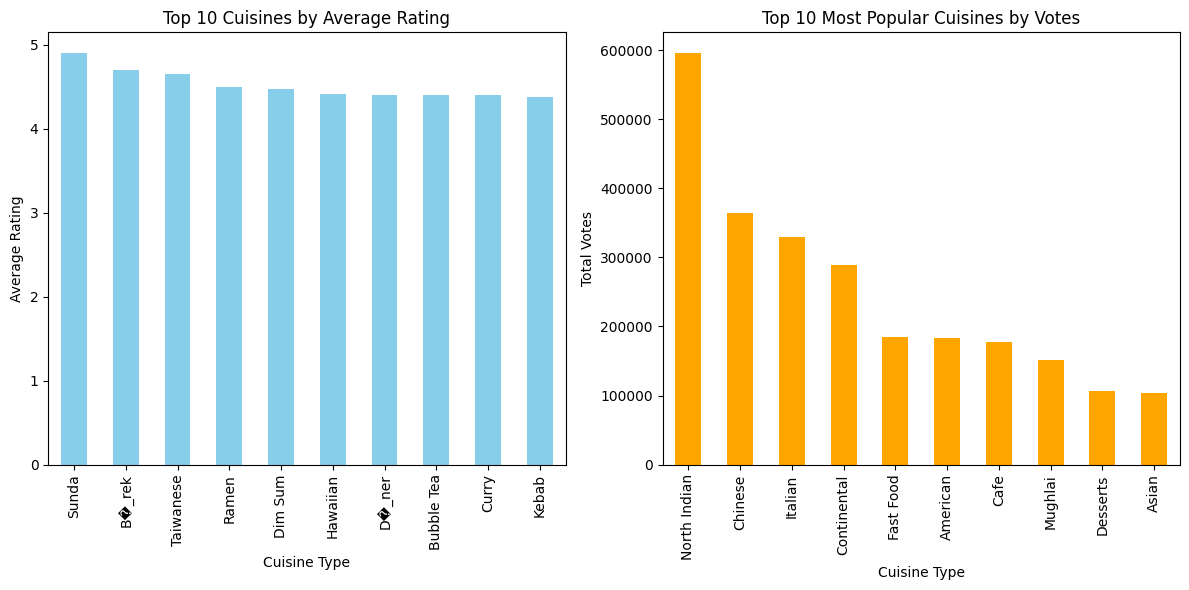

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing: Handle missing values in 'Cuisines' column
dataset['Cuisines'] = dataset['Cuisines'].fillna('Unknown')

# Split cuisines into individual rows for analysis of individual cuisine types
cuisine_data = dataset.copy()
cuisine_data = cuisine_data.assign(Cuisines=cuisine_data['Cuisines'].str.split(', '))
cuisine_data = cuisine_data.explode('Cuisines')

# Relationship between cuisine types and average rating
cuisine_rating = cuisine_data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Most popular cuisines based on total votes
cuisine_votes = cuisine_data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# Determine specific cuisines with higher ratings (threshold: above average rating)
average_rating = dataset['Aggregate rating'].mean()
high_rated_cuisines = cuisine_rating[cuisine_rating > average_rating]

# Display results
print("Top 10 Cuisines by Average Rating:")
print(cuisine_rating.head(10))

print("\nTop 10 Most Popular Cuisines by Votes:")
print(cuisine_votes.head(10))

print("\nCuisines with Higher than Average Rating:")
print(high_rated_cuisines)

# Visualization
plt.figure(figsize=(12, 6))

# Top 10 cuisines by average rating
plt.subplot(1, 2, 1)
cuisine_rating.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Cuisines by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Cuisine Type')

# Top 10 cuisines by votes
plt.subplot(1, 2, 2)
cuisine_votes.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Popular Cuisines by Votes')
plt.ylabel('Total Votes')
plt.xlabel('Cuisine Type')

plt.tight_layout()
plt.show()
